## This notebook tries to explore the stats of Mario Kart 8 Deluxe characters and the possible configurations. This is by no means a definitive solution to who the best character actually is, but is a fun way to show how i used data science to prioritize attributes, and how i could narrow down a setup that works for my playstyle!

#### Thanks to https://github.com/hinnefe2/hinnefe2.github.io/blob/master/notebooks/mario-kart.ipynb for inspiring me to do this small project! Data is gathered from: https://data.world/databeats/mario-kart-8-deluxe-kart-stats

So for a long time i have been playing Mario Kart without any proper idea of how my setup really reflects what i want it to. I feel like i have a good feeling of what stats i prefer, but i want to check if there are points in which i can tune my setup to optimize my playstyle, and to see if i actually had it right all along. To help me out, i use the power of Data Science. Let's start by loading and looking at the data!

In [250]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [633]:
characters = pd.read_csv('characters.csv', index_col=0)
vehicles = pd.read_csv('bodies.csv', index_col=0)
gliders = pd.read_csv('gliders.csv', index_col=0)
tires = pd.read_csv('tires.csv', index_col=0)

In [634]:
gliders = pd.read_csv('gliders.csv', index_col=0)


In [635]:
characters.head(2)

,Class,Speed,Speed (Water),Speed (Air),Speed (Ground),Acceleration,Weight,Handling,Handling (Water),Handling (Air),Handling(Ground),Traction,Mini Turbo
Character,,,,,,,,,,,,,
Baby Mario,Light,2.25,2.25,2.25,2.25,3.25,2.25,4.75,4.75,4.75,4.75,4.5,3.0
Baby Luigi,Light,2.25,2.25,2.25,2.25,3.25,2.25,4.75,4.75,4.75,4.75,4.5,3.0


In [636]:
vehicles.head(2)

,Speed,Acceleration,Weight,Handling,Traction,Mini Turbo
Vehicle,,,,,,
Standard Kart,0.0,0.0,0.00,0.0,0.00,0.0
Pipe Frame,-0.5,0.5,-0.25,0.5,0.25,0.5


In [637]:
gliders.head(10)

,Type,Speed,Speed (Water),Speed (Air),Speed (Ground),Acceleration,Weight,Handling,Handling (Water),Handling (Air),Handling(Ground),Traction,Mini Turbo
Body,,,,,,,,,,,,,
Super,Speed,0,0,0.25,0,0.00,0.00,0,0,0.00,0,0,0.00
Waddle Wing,Speed,0,0,0.25,0,0.00,0.00,0,0,0.00,0,0,0.00
Plane,Speed,0,0,0.25,0,0.00,0.00,0,0,0.00,0,0,0.00
Wario Wing,Speed,0,0,0.25,0,0.00,0.00,0,0,0.00,0,0,0.00
Gold,Speed,0,0,0.25,0,0.00,0.00,0,0,0.00,0,0,0.00
Flower,Acceleration,0,0,0.00,0,0.25,-0.25,0,0,0.25,0,0,0.25
Peach Parasol,Acceleration,0,0,0.00,0,0.25,-0.25,0,0,0.25,0,0,0.25
MKTV Parafoil,Acceleration,0,0,0.00,0,0.25,-0.25,0,0,0.25,0,0,0.25
Bowser Kite,Acceleration,0,0,0.00,0,0.25,-0.25,0,0,0.25,0,0,0.25


In [638]:
tires.head(2)

,Speed,Speed (Water),Speed (Air),Speed (Ground),Acceleration,Weight,Handling,Handling (Water),Handling (Air),Handling(Ground),Traction,Mini Turbo
Body,,,,,,,,,,,,
Standard,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Blue Standard,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Already we can see that the character is what truly defines your base stats, and that the vehicle, gliders and tires are "tuning" configurations, and give +- stats relative to what the character has. Other than that, we can also see that there are different speeds for Water, Air and Ground. This is something i will look away from in this notebook due to the fact that when this is played in the office, Random map is the choice that dominates. One thing to notify here is that there are two kinds of gliders, bad and better. One gives acceleration and mini turbo, the other gives speed in air. Because of this I'm picking out two gliders giving both acceleration and mini turbo. 

In [639]:
gliders = gliders[8:]

In [640]:
def drop_environment_stats(dataframes):
    for i, dataframe in enumerate(dataframes):
        dataframes[i] = dataframe.drop(columns=['Speed (Water)',
                                              'Speed (Air)',
                                              'Speed (Ground)',
                                              'Handling (Water)',
                                              'Handling (Air)',
                                              'Handling(Ground)'])
    return dataframes[0], dataframes[1], dataframes[2]

In [641]:
characters, gliders, tires = drop_environment_stats([characters, gliders, tires])

In [642]:
characters.head(2)

,Class,Speed,Acceleration,Weight,Handling,Traction,Mini Turbo
Character,,,,,,,
Baby Mario,Light,2.25,3.25,2.25,4.75,4.5,3.0
Baby Luigi,Light,2.25,3.25,2.25,4.75,4.5,3.0


Before i dive into what characters and vehicle etc that gives the optimal stats, i want to see what is most important if you're going for speed, acceleration etc.. Meaning, if you want speed, is the Character, vehicle, tire or glider most important? What does each part of the configuration account to?

Let's see if we can find the max stats possible, if you're looking to max one stat

In [643]:
max_stats = pd.DataFrame()

max_stats = max_stats.append(characters.iloc[:,1:].apply(np.max), ignore_index=True)
max_stats = max_stats.append(vehicles.apply(np.max), ignore_index=True)
max_stats = max_stats.append(tires.apply(np.max), ignore_index=True)
max_stats = max_stats.append(gliders.iloc[:,1:].apply(np.max), ignore_index=True)
max_stats = max_stats.append(max_stats.sum(axis=0), ignore_index=True)
max_stats.index = ['Character', 'Vehicle', 'Tire', 'Glider', 'Total']

In [644]:
max_stats

,Acceleration,Handling,Mini Turbo,Speed,Traction,Weight
Character,3.25,4.75,3.00,4.75,4.50,4.75
Vehicle,0.75,0.50,1.00,0.50,0.75,0.50
Tire,1.00,0.25,1.50,0.50,0.75,0.25
Glider,0.25,0.00,0.25,0.00,0.00,-0.25
Total,5.25,5.50,5.75,5.75,6.00,5.25


We see that the max score you can get for each attribute differs, and that how much stats you can get from each configuration varies. Take <b>Mini Turbo</b> and <b>Speed</b> as comparison, where Speed gets 4.75/5.75 from the character, Mini Turbo gets 1.5/5.75 of its points from choice of Tire. Meaning that if you want max Mini Turbo, the total configuration is very important. While if you want speed, you can simply pick the character with most speed, and almost be at your full potential. From this, i would say that the <b>Character is the most important configuration</b>, followed by Tire and Vehicle. Gliders only support Acceleration, and not by much

A question i have in mind though is if each attribute carries the same weight? Personally, i think some of these attributes are less important than others, and therefore might suspect that some of them can be removed from this analysis. Stuff like <b>Traction, Weight and Handling are things you can learn in game</b>, you can become very skilled at a poorly handling character. While attributes like <b>Acceleration, Mini Turbo and Speed are attributes that can help you greatly<b/> in playing well with that specific game style you like.  

##### Just to make sure, i want to look at the correlation between the different attributes for each configuration, to see if anything sticks out. 

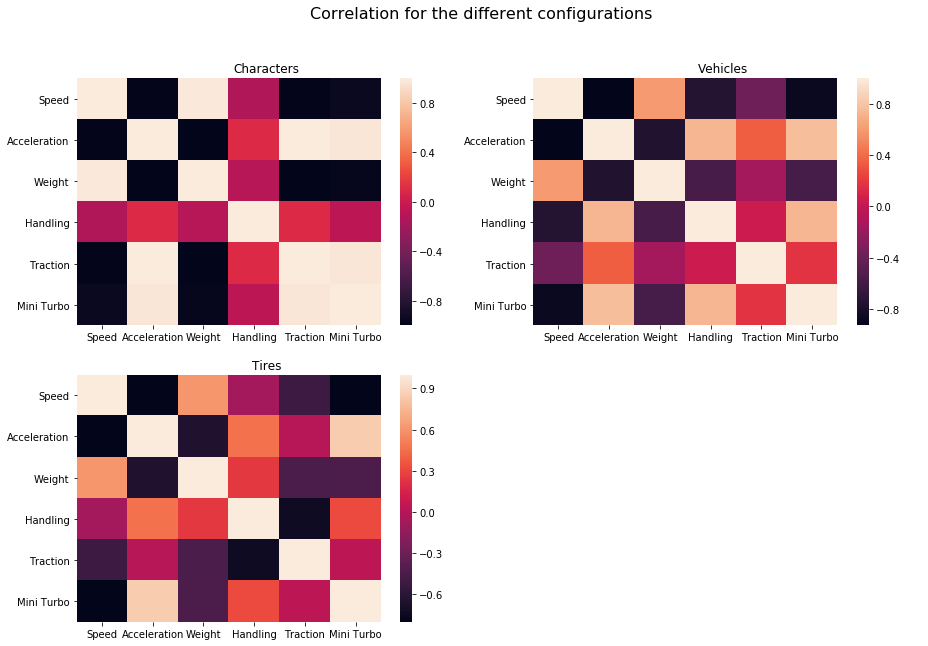

In [645]:
fig, (ax, ax2) = plt.subplots(2,2, figsize=(15,10))

fig.suptitle("Correlation for the different configurations", fontsize=16)
fig.add_subplot(221)
sns.heatmap(characters.corr())
ax[0].set_title('Characters')
ax[0].axis('off')
fig.add_subplot(222)
sns.heatmap(vehicles.corr())
ax[1].set_title('Vehicles')
ax[1].axis('off')
fig.add_subplot(223)
sns.heatmap(tires.corr())
ax2[0].set_title('Tires')
ax2[0].axis('off')
ax2[1].axis('off')
plt.show()

The first thing i notice is that for all configurations, <b>Speed and Acceleration are hard tradeoffs</b>. Speed and Weight also seems to be highly correlated for Characters, Vehicles and Tires, mostly so however for Characters. Acceleration works the other way, being inversely correlated with Weight. The tradeoffs for the Characters seems "tougher" than for Vehicles and Tires, with there being a lot more variety in correlation for Vehicles and Tires. But as i stated before i look at Character as the main configuration, and look at the rest as tuning the stats for the character. The following assumptions are made mostly with Characters in mind:  

Looking at the correlation for Characters, Speed and Weight have identical correlations. Mini Turbo and Traction are also two attributes that correlate almost identical with the other attributes. In addition, it was mentioned earlier that some attributes are learnable in game, while others are properties that help fit your playstyle

Due to this, <b>I'm going to narrow down the attributes of focus down to 4: Speed, Acceleration, Handling and Mini Turbo</b>. Weight is removed due to the high correlation with Speed. Traction is also removed because of the high correlation with Acceleration.

In [646]:
characters.drop(columns=['Traction', 'Weight'], inplace=True)
vehicles.drop(columns=['Traction', 'Weight'], inplace=True)
tires.drop(columns=['Traction', 'Weight'], inplace=True)
gliders.drop(columns=['Traction', 'Weight'], inplace=True)

For simplicity, I'm also going to remove the Class, and Type columns from characters and gliders, as these are only descriptive columns (Heavy, light, medium etc). This makes the structure the same for all dataframes.

In [647]:
characters.drop(columns=['Class'], inplace=True)
gliders.drop(columns=['Type'], inplace=True)

Next step is to get all the different combinations and to aggregate the attributes of each combination, so that we can compare the different configurations.

In [648]:
import itertools

combinations = [characters.index.values, vehicles.index.values, tires.index.values, gliders.index.values]
combinations = list(itertools.product(*combinations))

In [732]:
combinations[:5]

[('Baby Mario', 'Standard Kart', 'Standard', 'Bowser Kite'),
 ('Baby Mario', 'Standard Kart', 'Standard', 'Cloud'),
 ('Baby Mario', 'Standard Kart', 'Blue Standard', 'Bowser Kite'),
 ('Baby Mario', 'Standard Kart', 'Blue Standard', 'Cloud'),
 ('Baby Mario', 'Standard Kart', 'Offroad', 'Bowser Kite')]

In [651]:
combinations_df = pd.DataFrame(combinations, columns = ['Character', 'Vehicle', 'Tire', 'Glider'])
combinations_df.head(2)

,Character,Vehicle,Tire,Glider
0,Baby Mario,Standard Kart,Standard,Bowser Kite
1,Baby Mario,Standard Kart,Standard,Cloud


In [652]:
def add_stats(row):
    #This takes way too long, is there any other way?? Adding from each dataframe takes a long time
    c,v,t,g = row
    speed = characters.loc[c]['Speed'] + vehicles.loc[v]['Speed'] + tires.loc[t]['Speed'] + gliders.loc[g]['Speed']
    acc = characters.loc[c]['Acceleration'] + vehicles.loc[v]['Acceleration'] + tires.loc[t]['Acceleration'] + gliders.loc[g]['Acceleration']
    hand = characters.loc[c]['Handling'] + vehicles.loc[v]['Handling'] + tires.loc[t]['Handling'] + gliders.loc[g]['Handling']
    turbo = characters.loc[c]['Mini Turbo'] + vehicles.loc[v]['Mini Turbo'] + tires.loc[t]['Mini Turbo'] + gliders.loc[g]['Mini Turbo']
    return pd.Series([speed, acc, hand, turbo])

In [653]:
combinations_df[['Speed', 'Acceleration', 'Handling','Mini Turbo']] = pd.DataFrame(combinations_df.apply(add_stats, axis=1))

In [654]:
combinations_df

,Character,Vehicle,Tire,Glider,Speed,Acceleration,Handling,Mini Turbo
0,Baby Mario,Standard Kart,Standard,Bowser Kite,2.25,3.50,4.75,3.25
1,Baby Mario,Standard Kart,Standard,Cloud,2.25,3.50,4.75,3.25
2,Baby Mario,Standard Kart,Blue Standard,Bowser Kite,2.25,3.50,4.75,3.25
3,Baby Mario,Standard Kart,Blue Standard,Cloud,2.25,3.50,4.75,3.25
4,Baby Mario,Standard Kart,Offroad,Bowser Kite,2.25,3.50,4.75,3.25
5,Baby Mario,Standard Kart,Offroad,Cloud,2.25,3.50,4.75,3.25
6,Baby Mario,Standard Kart,Retro Offroad,Bowser Kite,2.25,3.50,4.75,3.25
7,Baby Mario,Standard Kart,Retro Offroad,Cloud,2.25,3.50,4.75,3.25
8,Baby Mario,Standard Kart,Monster,Bowser Kite,2.25,3.50,4.00,3.25
9,Baby Mario,Standard Kart,Monster,Cloud,2.25,3.50,4.00,3.25


So we finally have all the combinations and the scores for each combination, now we can dig into what configurations gives the "best" stats! Let's just start by looking at some general data from the different configurations:

In [669]:
combinations_df.sum(axis=1).describe()

count    46080.00000
mean        13.61059
std          1.34829
min          9.50000
25%         12.75000
50%         13.75000
75%         14.50000
max         17.25000
dtype: float64

Some important information was found here! Based on the 4 attributes that was chosen out, there are clearly some that has way higher combined score (total sum). The mean is at 13.6, while some can get a score of up to 17.25, that is a huge difference! Since these are the four attributes I'm interested in, i only want to consider those configurations that gives me the highest total sum. As only 25% are above 14.5, i want to check out those configurations that are above that level. Let's check it out:

In [693]:
combinations_df[combinations_df.sum(axis=1)>16].sort_values('Speed', ascending=False)

,Character,Vehicle,Tire,Glider,Speed,Acceleration,Handling,Mini Turbo
45957,Mii Heavy,Teddy Buggy,Button,Cloud,4.0,3.50,5.25,3.75
41456,Wario,Yoshi Bike,Button,Bowser Kite,4.0,3.50,5.25,3.75
43866,Morton Koopa,Tanooki Kart,Azure Roller,Bowser Kite,4.0,2.75,5.25,4.50
43865,Morton Koopa,Tanooki Kart,Roller,Cloud,4.0,2.75,5.25,4.50
43864,Morton Koopa,Tanooki Kart,Roller,Bowser Kite,4.0,2.75,5.25,4.50
43761,Morton Koopa,Mercedes Silver Arrow,Button,Cloud,4.0,3.50,5.25,3.75
43760,Morton Koopa,Mercedes Silver Arrow,Button,Bowser Kite,4.0,3.50,5.25,3.75
43759,Morton Koopa,Mercedes Silver Arrow,Azure Roller,Cloud,4.0,3.50,5.25,3.75
43758,Morton Koopa,Mercedes Silver Arrow,Azure Roller,Bowser Kite,4.0,3.50,5.25,3.75
43757,Morton Koopa,Mercedes Silver Arrow,Roller,Cloud,4.0,3.50,5.25,3.75


So we have 1704 different configurations possible, that are all valid in my opinion. Now we have to figure out which ones of the remaining attributes we want to prioritize! As a starting point, I'm going to look at Speed and Acceleration, as these to me are key attributes to a good configuration

In [696]:
speed_acc = combinations_df[['Speed','Acceleration']]
speed_acc.describe()

,Speed,Acceleration
count,46080.000000,46080.000000
mean,3.350694,2.989236
std,0.992447,0.781990
min,1.000000,1.000000
25%,2.500000,2.500000
50%,3.250000,3.000000
75%,4.250000,3.500000
max,5.750000,5.250000


I want to see if i can get a configuration that scores great in both Speed and Acceleration. only 25% of the configurations are above 4.25 in Speed and 3.5 in Acceleration respectively. Is it possible to have higher scores in both of these at the same time? 

In [705]:
speed_acc[(speed_acc['Speed']>4.25)].describe()

,Speed,Acceleration
count,8952.000000,8952.000000
mean,4.771135,2.028597
std,0.323210,0.435376
min,4.300000,1.000000
25%,4.500000,1.750000
50%,4.750000,2.000000
75%,5.000000,2.250000
max,5.750000,3.000000


It seems that if i want a configuration with > 4.25 in speed, the highest acceleration i can get is 3.0, what max speed can i have at 3 acceleration? 

In [706]:
speed_acc[(speed_acc['Acceleration']==3)].describe()

,Speed,Acceleration
count,5782.000000,5782.0
mean,3.296351,3.0
std,0.627682,0.0
min,2.000000,3.0
25%,2.750000,3.0
50%,3.250000,3.0
75%,3.750000,3.0
max,4.500000,3.0


So the max speed i can have, with an acceleration of 3, is 4.5. Looking at the table below this seems pretty good. I will then have more speed than 75% of the configurations, and acceleration better than 50% of the configurations. A balanced way to make sure you both can maintain a good speed, and get back up after someone blue-shells you for the 3rd time.

In [707]:
combinations_df.describe()

,Speed,Acceleration,Handling,Mini Turbo
count,46080.000000,46080.000000,46080.000000,46080.000000
mean,3.350694,2.989236,4.131944,3.138715
std,0.992447,0.781990,0.715137,0.862240
min,1.000000,1.000000,1.750000,1.000000
25%,2.500000,2.500000,3.750000,2.500000
50%,3.250000,3.000000,4.250000,3.000000
75%,4.250000,3.500000,4.750000,3.750000
max,5.750000,5.250000,5.500000,5.750000


In [713]:
combinations_df[(combinations_df['Speed']==4.5) & (combinations_df['Acceleration']==3)]

,Character,Vehicle,Tire,Glider,Speed,Acceleration,Handling,Mini Turbo
40378,Wario,Pipe Frame,Slim,Bowser Kite,4.5,3.0,5.50,2.50
40379,Wario,Pipe Frame,Slim,Cloud,4.5,3.0,5.50,2.50
40380,Wario,Pipe Frame,Crimson Slim,Bowser Kite,4.5,3.0,5.50,2.50
40381,Wario,Pipe Frame,Crimson Slim,Cloud,4.5,3.0,5.50,2.50
40382,Wario,Pipe Frame,Metal,Bowser Kite,4.5,3.0,5.25,2.50
40383,Wario,Pipe Frame,Metal,Cloud,4.5,3.0,5.25,2.50
40384,Wario,Pipe Frame,Gold,Bowser Kite,4.5,3.0,5.25,2.50
40385,Wario,Pipe Frame,Gold,Cloud,4.5,3.0,5.25,2.50
40702,Wario,Landship,Slim,Bowser Kite,4.5,3.0,4.50,2.50
40703,Wario,Landship,Slim,Cloud,4.5,3.0,4.50,2.50


There are actually 208 different combinations that gives me the Speed and Acceleration i want. And the characters and vehicles i can use to achieve that are: 

In [725]:
print('Characters:')
print(np.unique(combinations_df[(combinations_df['Speed']==4.5) & (combinations_df['Acceleration']==3)]['Character'].values))
print("\nVehicles:")
print(np.unique(combinations_df[(combinations_df['Speed']==4.5) & (combinations_df['Acceleration']==3)]['Vehicle'].values))

Characters:
['Bowser' 'Mii Heavy' 'Morton Koopa' 'Wario']

Vehicles:
['Blue Falcon' 'City Tripper' 'Landship' 'Pipe Frame' 'Splat Buggy'
 'Streetle' 'Varmint']


I'm pretty pleased with the results already, and could comfortably choose any of the tires / gliders with any combination of these characters and cars. However, on a personal note, i like Wario the most of these characters, and when it comes to Handling vs Mini Turbo i would prefer having as much Mini Turbo as possible. Let's go the last mile! 

In [721]:
combinations_df[(combinations_df['Speed']==4.5) & 
               (combinations_df['Acceleration']==3) & 
               (combinations_df['Character']=='Wario')]

,Character,Vehicle,Tire,Glider,Speed,Acceleration,Handling,Mini Turbo
40378,Wario,Pipe Frame,Slim,Bowser Kite,4.5,3.0,5.50,2.50
40379,Wario,Pipe Frame,Slim,Cloud,4.5,3.0,5.50,2.50
40380,Wario,Pipe Frame,Crimson Slim,Bowser Kite,4.5,3.0,5.50,2.50
40381,Wario,Pipe Frame,Crimson Slim,Cloud,4.5,3.0,5.50,2.50
40382,Wario,Pipe Frame,Metal,Bowser Kite,4.5,3.0,5.25,2.50
40383,Wario,Pipe Frame,Metal,Cloud,4.5,3.0,5.25,2.50
40384,Wario,Pipe Frame,Gold,Bowser Kite,4.5,3.0,5.25,2.50
40385,Wario,Pipe Frame,Gold,Cloud,4.5,3.0,5.25,2.50
40702,Wario,Landship,Slim,Bowser Kite,4.5,3.0,4.50,2.50
40703,Wario,Landship,Slim,Cloud,4.5,3.0,4.50,2.50


In [730]:
combinations_df[(combinations_df['Speed']==4.5) & 
               (combinations_df['Acceleration']==3) & 
               (combinations_df['Character']=='Wario')].describe()

,Speed,Acceleration,Handling,Mini Turbo
count,52.0,52.0,52.000000,52.000000
mean,4.5,3.0,4.923077,2.740385
std,0.0,0.0,0.457879,0.367028
min,4.5,3.0,4.250000,2.500000
25%,4.5,3.0,4.500000,2.500000
50%,4.5,3.0,4.750000,2.500000
75%,4.5,3.0,5.250000,2.750000
max,4.5,3.0,5.500000,3.500000


In [723]:
combinations_df[(combinations_df['Speed']==4.5) & 
               (combinations_df['Acceleration']==3) & 
               (combinations_df['Character']=='Wario') &
               (combinations_df['Mini Turbo']==3.5)]

,Character,Vehicle,Tire,Glider,Speed,Acceleration,Handling,Mini Turbo
40948,Wario,Blue Falcon,Roller,Bowser Kite,4.5,3.0,4.75,3.5
40949,Wario,Blue Falcon,Roller,Cloud,4.5,3.0,4.75,3.5
40950,Wario,Blue Falcon,Azure Roller,Bowser Kite,4.5,3.0,4.75,3.5
40951,Wario,Blue Falcon,Azure Roller,Cloud,4.5,3.0,4.75,3.5
40952,Wario,Blue Falcon,Button,Bowser Kite,4.5,3.0,4.75,3.5
40953,Wario,Blue Falcon,Button,Cloud,4.5,3.0,4.75,3.5


So there we go! It seems that the way to go for me is to pick <b>Wario, Blue Falcon, Roller and Cloud</b>. Just to repeat, this is by no means any "solution" to what to do in Mario kart, but shows that it is possible to find your ideal configuration based on some assumptions, and personal opinions. See you on the circuit!  

<img src="Wario.png">